# Webscraping avec python

<a href="https://github.com/linogaliana/python-datascientist/blob/master/course/manipulation/04_webscraping_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter.png)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/course/manipulation/04_webscraping_TP.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter.png)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/course/manipulation/04_webscraping_TP.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python.png)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?autoLaunch=true&onyxia.friendlyName=%C2%ABpython-datascience%C2%BB&init.personalInit=%C2%ABhttps%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmaster%2Fsspcloud%2Finit-jupyter.sh%C2%BB&init.personalInitArgs=%C2%ABcourse/manipulation%2004_webscraping_TP.ipynb%C2%BB&security.allowlist.enabled=false)<br>
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=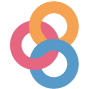.png)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=course/manipulation/04_webscraping_TP.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master/course/manipulation/04_webscraping_TP.ipynb)
[![githubdev](https://img.shields.io/static/v1?logo=visualstudiocode&label=&message=Open%20in%20Visual%20Studio%20Code&labelColor=2c2c32&color=007acc&logoColor=007acc.png)](https://github.dev/linogaliana/python-datascientist/course/manipulation/04_webscraping_TP.ipynb)

Le [webscraping](https://fr.wikipedia.org/wiki/Web_scraping) désigne les techniques d’extraction du contenu des sites internet. C’est une pratique très utile pour toute personne souhaitant travailler sur des informations disponibles en ligne, mais n’existant pas forcément sous la forme d’un tableau *Excel*.

Ce TP vous présente comment créer et exécuter des robots afin de recupérer rapidement des informations utiles à vos projets actuels ou futurs.

Le *webscraping* a un certain nombre d’enjeux en termes de légalité, qui ne seront pas enseignés dans ce cours mais dans un cours de 3A à l’ENSAE. En particulier, la CNIL a publié en 2020 de nouvelles directives sur le *webscraping* reprécisant que toute donnée ne peut être réutilisée à l’insu de la personne à laquelle ces données appartiennent.

Enfin, il est à noter que ce notebook est très fortement inspiré et réadapté à partir de [celui de Xavier Dupré](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/TD2A_Eco_Web_Scraping.html), l’ancien professeur de la matière.

# Un détour par le Web : comment fonctionne un site ?

Même si ce TP ne vise pas à faire un cours de web, il vous faut néanmoins certaines bases sur la manière dont un site internet fonctionne afin de comprendre comment sont structurées les informations sur une page.

Un site Web est un ensemble de pages codées en *HTML* qui permet de décrire à la fois le contenu et la forme d’une page *Web*.

Pour voir cela, ouvrez n’importe quelle page web et faites un clic-droit dessus.
- Sous `Chrome` <i class="fab fa-chrome"></i> : Cliquez ensuite sur “Affichez le code source de la page” (<kbd>CTRL</kbd>+<kbd>U</kbd>) ;
- Sous `Firefox` <i class="fab fa-firefox"></i> : “Code source de la page” (<kbd>CTRL</kbd>+<kbd>MAJ</kbd>+<kbd>K</kbd>) ;
- Sous `Edge` <i class="fab fa-edge"></i> : “Affichez la page source” (<kbd>CTRL</kbd>+<kbd>U</kbd>) ;
- Sous `Safari` <i class="fab fa-safari"></i> : voir comment faire [ici](https://fr.wikihow.com/voir-le-code-source)

## Les balises

Sur une page web, vous trouverez toujours à coup sûr des éléments comme `<head>`, `<title>`, etc. Il s’agit des codes qui vous permettent de structurer le contenu d’une page *HTML* et qui s’appellent des **balises**.
Citons, par exemple, les balises `<p>`, `<h1>`, `<h2>`, `<h3>`, `<strong>` ou `<em>`.
Le symbole `< >` est une balise : il sert à indiquer le début d’une partie. Le symbole `</ >` indique la fin de cette partie. La plupart des balises vont par paires, avec une *balise ouvrante* et une *balise fermante* (par exemple `<p>` et `</p>`).

### Exemple : les balise des tableaux

| Balise      | Description                     |
|-------------|---------------------------------|
| `<table>`   | Tableau                         |
| `<caption>` | Titre du tableau                |
| `<tr>`      | Ligne de tableau                |
| `<th>`      | Cellule d’en-tête               |
| `<td>`      | Cellule                         |
| `<thead>`   | Section de l’en-tête du tableau |
| `<tbody>`   | Section du corps du tableau     |
| `<tfoot>`   | Section du pied du tableau      |

**Application : un tableau en HTML**

Le code *HTML* du tableau suivant

``` {html}
<table>
<caption> Le Titre de mon tableau </caption>

   <tr>
      <th>Prénom</th>
      <th>Nom</th>
      <th>Profession</th>
   </tr>
   <tr>
      <td>Mike </td>
      <td>Stuntman</td>
      <td>Cascadeur</td>
   </tr>
   <tr>
      <td>Mister</td>
      <td>Pink</td>
      <td>Gangster</td>
   </tr>
</table>
```

Donnera dans le navigateur :

Le Titre de mon tableau

Prénom

Nom

Profession

Mike

Stuntman

Cascadeur

Mister

Pink

Gangster

### Parent et enfant

Dans le cadre du langage HTML, les termes de parent (*parent*) et enfant (*child*) servent à désigner des élements emboîtés les uns dans les autres. Dans la construction suivante, par exemple :

``` html
< div> 
    < p>
       bla,bla
    < /p>
< /div>
```

Sur la page web, cela apparaitra de la manière suivante :

    <p>
       bla,bla
    </p>

On dira que l’élément `<div>` est le parent de l’élément `<p>` tandis que l’élément `<p>` est l’enfant de l’élément `<div>`.

*Mais pourquoi apprendre ça pour “scraper”, me direz-vous ?*

Parce que, pour bien récupérer les informations d’un site internet, il faut pouvoir comprendre sa structure et donc son code HTML. Les fonctions python qui servent au scraping sont principalement construites pour vous permettre de naviguer entre les balises.

# Scraper avec python: le package `BeautifulSoup`

## Les packages disponibles

Nous allons essentiellement utiliser le package [BeautifulSoup4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) pour ce cours, mais d’autres packages existent (Selenium, Scrapy…). Il s’utilise souvent en conjonction avec
[urllib](https://docs.python.org/3/library/urllib.html#module-urllib).

`BeautifulSoup` sera suffisant quand vous voudrez travailler sur des pages HTML statiques. Dès que les informations que vous recherchez sont générées via l’exécution de scripts [Javascript](https://fr.wikipedia.org/wiki/JavaScript), il vous faudra passer par des outils comme [Selenium](https://selenium-python.readthedocs.io/).

De même, si vous ne connaissez pas l’URL, il faudra passer par un framework comme [Scrapy](https://scrapy.org/), qui passe facilement d’une page à une autre (“crawl”). Scrapy est plus complexe à manipuler que BeautifulSoup : si vous voulez plus de détails, rendez-vous sur la page du [tutoriel Scrapy](https://doc.scrapy.org/en/latest/intro/tutorial.html).

Le *webscraping* est un domaine où la reproductibilité est compliquée à mettre en oeuvre. Une page *web* évolue
potentiellement régulièrement et d’une page web à l’autre, la structure peut
être très différente ce qui rend certains codes difficilement exportables.
Par conséquent, la meilleure manière d’avoir un programme fonctionnel est
de comprendre la structure d’une page web et dissocier les éléments exportables
à d’autres cas d’usages des requêtes *ad hoc*.

{{\< tweet 1474353569780355074 \>}}

In [2]:
import urllib
import bs4
import pandas
from urllib import request

## Récupérer le contenu d’une page HTML

On va commencer doucement. Prenons une page wikipedia, par exemple celle de la Ligue 1 de football : [Championnat de France de football 2019-2020](https://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2019-2020). On va souhaiter récupérer la liste des équipes, ainsi que les url des pages Wikipedia de ces équipes.

In [3]:
# Etape 1 : se connecter à la page wikipedia et obtenir le code source

url_ligue_1 = "https://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2019-2020"
    
request_text = request.urlopen(url_ligue_1).read()
# print(request_text[:1000])    

In [4]:
type(request_text)

bytes

In [5]:
# Etape 2 : utiliser le package BeautifulSoup
# qui "comprend" les balises contenues dans la chaine de caractères renvoyée par la fonction request

page = bs4.BeautifulSoup(request_text, "lxml")

#print(page)

Si on print l’objet, page créée avec BeautifulSoup, on voit que ce n’est plus une chaine de caractères mais bien une page HTML avec des balises. On peut à présent chercher des élements à l’intérieur de ces balises.

## La méthode `find`

Par exemple, si on veut connaître le titre de la page, on utilise la méthode `.find` et on lui demande *“title”*

In [6]:
print(page.find("title"))

<title>Championnat de France de football 2019-2020 — Wikipédia</title>

La methode `.find` ne renvoie que la première occurence de l’élément.

Pour vous en assurer vous pouvez :
- copier le bout de code source obtenu,
- le coller dans une cellule de votre notebook
- et passer la cellule en “Markdown”

La cellule avec le copier-coller du code source donne :

In [7]:
print(page.find("table"))

<table><caption style="background:#99cc99;color:#000000;">Généralités</caption><tbody><tr>
<th scope="row" style="width:10.5em;">Sport</th>
<td>
<a href="/wiki/Football" title="Football">Football</a></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Organisateur(s)</th>
<td>
<a href="/wiki/Ligue_de_football_professionnel" title="Ligue de football professionnel">LFP</a></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Édition</th>
<td>
<abbr class="abbr" title="Quatre-vingt-deuxième (huitante-deuxième / octante-deuxième)">82<sup>e</sup></abbr></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Lieu(x)</th>
<td>
<span class="datasortkey" data-sort-value="France"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France_(1794%E2%80%931815,_1830%E2%80%931974,_2020%E2%80%93present).svg" title="Drapeau de la France"><img alt="Drapeau de la France" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.

ce qui est le texte source permettant de générer le tableau suivant:

Généralités

Sport

<a href="/wiki/Football" title="Football">Football</a>

Organisateur(s)

<a href="/wiki/Ligue_de_football_professionnel" title="Ligue de football professionnel">LFP</a>

Édition

<abbr class="abbr" title="Quatre-vingt-deuxième (huitante-deuxième / octante-deuxième)">82<sup>e</sup></abbr>

Lieu(x)

<span class="datasortkey" data-sort-value="France"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France_(1794%E2%80%931815,_1830%E2%80%931974,_2020%E2%80%93present).svg" title="Drapeau de la France"><img alt="Drapeau de la France" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_France_%281794%E2%80%931815%2C_1830%E2%80%931974%2C_2020%E2%80%93present%29.svg/20px-Flag_of_France_%281794%E2%80%931815%2C_1830%E2%80%931974%2C_2020%E2%80%93present%29.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_France_%281794%E2%80%931815%2C_1830%E2%80%931974%2C_2020%E2%80%93present%29.svg/30px-Flag_of_France_%281794%E2%80%931815%2C_1830%E2%80%931974%2C_2020%E2%80%93present%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_France_%281794%E2%80%931815%2C_1830%E2%80%931974%2C_2020%E2%80%93present%29.svg/40px-Flag_of_France_%281794%E2%80%931815%2C_1830%E2%80%931974%2C_2020%E2%80%93present%29.svg.png 2x" width="20"/></a> </span><a href="/wiki/France" title="France">France</a></span> et <br/><span class="datasortkey" data-sort-value="Monaco"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_Monaco.svg" title="Drapeau de Monaco"><img alt="Drapeau de Monaco" class="noviewer thumbborder" data-file-height="800" data-file-width="1000" decoding="async" height="16" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Flag_of_Monaco.svg/20px-Flag_of_Monaco.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Flag_of_Monaco.svg/30px-Flag_of_Monaco.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Flag_of_Monaco.svg/40px-Flag_of_Monaco.svg.png 2x" width="20"/></a> </span><a href="/wiki/Monaco" title="Monaco">Monaco</a></span>

Date

Du <time class="nowrap date-lien" data-sort-value="2019-08-09" datetime="2019-08-09"><a href="/wiki/9_ao%C3%BBt_en_sport" title="9 août en sport">9</a> <a class="mw-redirect" href="/wiki/Ao%C3%BBt_2019_en_sport" title="Août 2019 en sport">août</a> <a href="/wiki/2019_en_football" title="2019 en football">2019</a></time><br/>au <time class="nowrap date-lien" data-sort-value="2020-03-08" datetime="2020-03-08"><a href="/wiki/8_mars_en_sport" title="8 mars en sport">8 mars</a> <a href="/wiki/2020_en_football" title="2020 en football">2020</a></time> <small>(arrêt définitif)</small>

Participants

20 équipes

Matchs joués

279 (sur 380 prévus)

Site web officiel

<a class="external text" href="https://www.ligue1.fr/" rel="nofollow">Site officiel</a>

## La méthode `findAll`

Pour trouver toutes les occurences, on utilise `.findAll()`.

In [9]:
print("Il y a", len(page.findAll("table")), "éléments dans la page qui sont des <table>")

Il y a 34 éléments dans la page qui sont des <table>

# Exercice guidé : obtenir la liste des équipes de Ligue 1

Dans le premier paragraphe de la page “Participants”, on a le tableau avec les résultats de l’année.

{{% box status=“exercise” title=“Exercice” icon=“fas fa-pencil-alt” %}}
Le but est de récupérer les informations contenues dans ce tableau.

Pour cela, nous allons procéder en 6 étapes:

1.  Trouver le tableau
2.  Récupérer chaque ligne du table
3.  Nettoyer les sorties en ne gardant que le texte sur une ligne
4.  Généraliser sur toutes les lignes
5.  Récupérer les entêtes du tableau
6.  Finalisation du tableau

{{% /box %}}

:one:
Trouver le tableau

``` python
# on identifie le tableau en question : c'est le premier qui a cette classe "wikitable sortable"
tableau_participants = page.find('table', {'class' : 'wikitable sortable'})

print(tableau_participants)
```

Club

Dernière<br/>montée

Budget<sup class="reference" id="cite_ref-3"><a href="#cite_note-3"><span class="cite_crochet">\[</span>3<span class="cite_crochet">\]</span></a></sup><br/>en M<a href="/wiki/Euro" title="Euro">€</a>

Classement<br/><a href="/wiki/Championnat_de_France_de_football_2018-2019" title="Championnat de France de football 2018-2019">2018-2019</a>

Entraîneur

Depuis

Stade

Capacité<br/>en L1<sup class="reference" id="cite_ref-4"><a href="#cite_note-4"><span class="cite_crochet">\[</span>4<span class="cite_crochet">\]</span></a></sup>

Nombre<br/>de saisons<br/>en L1

<a href="/wiki/Paris_Saint-Germain_Football_Club" title="Paris Saint-Germain Football Club">Paris Saint-Germain</a>

1974

637

<span data-sort-value="101 !"></span><abbr class="abbr" title="Premier">1<sup>er</sup></abbr>

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_Germany.svg" title="Drapeau : Allemagne"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="1000" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/20px-Flag_of_Germany.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/30px-Flag_of_Germany.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/40px-Flag_of_Germany.svg.png 2x" width="20"/></a></span> <a href="/wiki/Thomas_Tuchel" title="Thomas Tuchel">Thomas Tuchel</a>

2018

<a href="/wiki/Parc_des_Princes" title="Parc des Princes">Parc des Princes</a>

47 929

46

<a href="/wiki/LOSC_Lille" title="LOSC Lille">LOSC Lille</a>

2000

120

<span data-sort-value="102 !"></span><abbr class="abbr" title="Deuxième">2<sup>e</sup></abbr>

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Christophe_Galtier" title="Christophe Galtier">Christophe Galtier</a>

2017

<a href="/wiki/Stade_Pierre-Mauroy" title="Stade Pierre-Mauroy">Stade Pierre-Mauroy</a>

49 712

59

<a href="/wiki/Olympique_lyonnais" title="Olympique lyonnais">Olympique lyonnais</a>

1989

310

<span data-sort-value="103 !"></span><abbr class="abbr" title="Troisième">3<sup>e</sup></abbr>

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Rudi_Garcia" title="Rudi Garcia">Rudi Garcia</a>

2019

<a href="/wiki/Parc_Olympique_lyonnais" title="Parc Olympique lyonnais">Groupama Stadium</a>

57 206

60

<a href="/wiki/Association_sportive_de_Saint-%C3%89tienne" title="Association sportive de Saint-Étienne">AS Saint-Étienne</a>

2004

100

<span data-sort-value="104 !"></span><abbr class="abbr" title="Quatrième">4<sup>e</sup></abbr>

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Claude_Puel" title="Claude Puel">Claude Puel</a>

2019

<a href="/wiki/Stade_Geoffroy-Guichard" title="Stade Geoffroy-Guichard">Stade Geoffroy-Guichard</a>

41 965

66

<a href="/wiki/Olympique_de_Marseille" title="Olympique de Marseille">Olympique de Marseille</a>

1996

110

<span data-sort-value="105 !"></span><abbr class="abbr" title="Cinquième">5<sup>e</sup></abbr>

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_Portugal.svg" title="Drapeau : Portugal"><img alt="" class="noviewer thumbborder" data-file-height="400" data-file-width="600" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/20px-Flag_of_Portugal.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/30px-Flag_of_Portugal.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/40px-Flag_of_Portugal.svg.png 2x" width="20"/></a></span> <a href="/wiki/Andr%C3%A9_Villas-Boas" title="André Villas-Boas">André Villas-Boas</a>

2019

<a href="/wiki/Stade_V%C3%A9lodrome" title="Stade Vélodrome">Orange Vélodrome</a>

66 226

69

<a href="/wiki/Montpellier_H%C3%A9rault_Sport_Club" title="Montpellier Hérault Sport Club">Montpellier HSC</a>

2009

40

<span data-sort-value="106 !"></span><abbr class="abbr" title="Sixième">6<sup>e</sup></abbr>

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_Armenia.svg" title="Drapeau : Arménie"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="1200" decoding="async" height="10" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Flag_of_Armenia.svg/20px-Flag_of_Armenia.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Flag_of_Armenia.svg/30px-Flag_of_Armenia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Flag_of_Armenia.svg/40px-Flag_of_Armenia.svg.png 2x" width="20"/></a></span><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Michel_Der_Zakarian" title="Michel Der Zakarian">Michel Der Zakarian</a>

2017

<a href="/wiki/Stade_de_la_Mosson" title="Stade de la Mosson">Stade de la Mosson</a>

22 000

27

<a href="/wiki/Olympique_Gymnaste_Club_Nice" title="Olympique Gymnaste Club Nice">OGC Nice</a>

2002

50

<span data-sort-value="107 !"></span><abbr class="abbr" title="Septième">7<sup>e</sup></abbr>

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Patrick_Vieira" title="Patrick Vieira">Patrick Vieira</a>

2018

<a href="/wiki/Allianz_Riviera" title="Allianz Riviera">Allianz Riviera</a>

35 596

60

<a href="/wiki/Stade_de_Reims" title="Stade de Reims">Stade de Reims</a>

2018

45

<span data-sort-value="108 !"></span><abbr class="abbr" title="Huitième">8<sup>e</sup></abbr>

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/David_Guion" title="David Guion">David Guion</a>

2017

<a href="/wiki/Stade_Auguste-Delaune" title="Stade Auguste-Delaune">Stade Auguste-Delaune</a>

20 546

35

<a href="/wiki/N%C3%AEmes_Olympique" title="Nîmes Olympique">Nîmes Olympique</a>

2018

27

<span data-sort-value="109 !"></span><abbr class="abbr" title="Neuvième">9<sup>e</sup></abbr>

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Bernard_Blaquart" title="Bernard Blaquart">Bernard Blaquart</a>

2015

<a href="/wiki/Stade_des_Costi%C3%A8res" title="Stade des Costières">Stade des Costières</a>

15 788

35

<a class="mw-redirect" href="/wiki/Stade_rennais_football_club" title="Stade rennais football club">Stade rennais FC</a>

1994

65

<span data-sort-value="110 !"></span><abbr class="abbr" title="Dixième">10<sup>e</sup></abbr>

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Julien_St%C3%A9phan" title="Julien Stéphan">Julien Stéphan</a>

2018

<a href="/wiki/Roazhon_Park" title="Roazhon Park">Roazhon Park</a>

29 194

62

<a href="/wiki/Racing_Club_de_Strasbourg_Alsace" title="Racing Club de Strasbourg Alsace">RC Strasbourg Alsace</a>

2017

43

<span data-sort-value="111 !"></span><abbr class="abbr" title="Onzième">11<sup>e</sup></abbr>

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Thierry_Laurey" title="Thierry Laurey">Thierry Laurey</a>

2016

<a href="/wiki/Stade_de_la_Meinau" title="Stade de la Meinau">Stade de la Meinau</a>

26 109

58

<a href="/wiki/Football_Club_de_Nantes" title="Football Club de Nantes">FC Nantes</a>

2013

70

<span data-sort-value="112 !"></span><abbr class="abbr" title="Douzième">12<sup>e</sup></abbr>

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Christian_Gourcuff" title="Christian Gourcuff">Christian Gourcuff</a>

2019

<a href="/wiki/Stade_de_la_Beaujoire" title="Stade de la Beaujoire">Stade de la Beaujoire - Louis Fonteneau</a>

35 322

51

<a class="mw-redirect" href="/wiki/Angers_sporting_club_de_l%27Ouest" title="Angers sporting club de l'Ouest">SCO d’Angers</a>

2015

32

<span data-sort-value="113 !"></span><abbr class="abbr" title="Treizième">13<sup>e</sup></abbr>

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/St%C3%A9phane_Moulin_(football)" title="Stéphane Moulin (football)">Stéphane Moulin</a>

2011

<a href="/wiki/Stade_Raymond-Kopa" title="Stade Raymond-Kopa">Stade Raymond-Kopa</a>

14 582

27

<a href="/wiki/Football_Club_des_Girondins_de_Bordeaux" title="Football Club des Girondins de Bordeaux">Girondins de Bordeaux</a>

1992

70

<span data-sort-value="114 !"></span><abbr class="abbr" title="Quatorzième">14<sup>e</sup></abbr>

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_Portugal.svg" title="Drapeau : Portugal"><img alt="" class="noviewer thumbborder" data-file-height="400" data-file-width="600" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/20px-Flag_of_Portugal.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/30px-Flag_of_Portugal.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/40px-Flag_of_Portugal.svg.png 2x" width="20"/></a></span> <a href="/wiki/Paulo_Sousa_(football,_1970)" title="Paulo Sousa (football, 1970)">Paulo Sousa</a>

2019

<a href="/wiki/Matmut_Atlantique" title="Matmut Atlantique">Matmut Atlantique</a>

42 115

66

<a href="/wiki/Amiens_Sporting_Club" title="Amiens Sporting Club">Amiens SC</a>

2017

30

<span data-sort-value="115 !"></span><abbr class="abbr" title="Quinzième">15<sup>e</sup></abbr>

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_Slovenia.svg" title="Drapeau : Slovénie"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="1200" decoding="async" height="10" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Flag_of_Slovenia.svg/20px-Flag_of_Slovenia.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Flag_of_Slovenia.svg/30px-Flag_of_Slovenia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Flag_of_Slovenia.svg/40px-Flag_of_Slovenia.svg.png 2x" width="20"/></a></span> <a href="/wiki/Luka_Elsner" title="Luka Elsner">Luka Elsner</a>

2019

<a href="/wiki/Stade_de_la_Licorne" title="Stade de la Licorne">Stade Crédit Agricole la Licorne</a>

12 999

2

<a href="/wiki/Toulouse_Football_Club" title="Toulouse Football Club">Toulouse FC</a>

2003

35

<span data-sort-value="116 !"></span><abbr class="abbr" title="Seizième">16<sup>e</sup></abbr>

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Denis_Zanko" title="Denis Zanko">Denis Zanko</a>

2020

<a href="/wiki/Stadium_de_Toulouse" title="Stadium de Toulouse">Stadium de Toulouse</a>

33 033

32

<a class="mw-redirect" href="/wiki/Association_sportive_de_Monaco_football_club" title="Association sportive de Monaco football club">AS Monaco</a>

2013

220

<span data-sort-value="117 !"></span><abbr class="abbr" title="Dix-septième">17<sup>e</sup></abbr>

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_Spain.svg" title="Drapeau : Espagne"><img alt="" class="noviewer thumbborder" data-file-height="500" data-file-width="750" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Spain.svg/20px-Flag_of_Spain.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Spain.svg/30px-Flag_of_Spain.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Spain.svg/40px-Flag_of_Spain.svg.png 2x" width="20"/></a></span> <a href="/wiki/Robert_Moreno" title="Robert Moreno">Robert Moreno</a>

2019

<a href="/wiki/Stade_Louis-II" title="Stade Louis-II">Stade Louis-II</a>

16 500

60

<a href="/wiki/Dijon_Football_C%C3%B4te-d%27Or" title="Dijon Football Côte-d'Or">Dijon FCO</a>

2016

38

<span data-sort-value="118 !"></span><abbr class="abbr" title="Dix-huitième">18<sup>e</sup></abbr>

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/St%C3%A9phane_Jobard" title="Stéphane Jobard">Stéphane Jobard</a>

2019

<a href="/wiki/Stade_Gaston-G%C3%A9rard" title="Stade Gaston-Gérard">Parc des Sports Gaston-Gérard</a>

15 459

4

<a href="/wiki/Football_Club_de_Metz" title="Football Club de Metz">FC Metz</a>

2019

40

<span data-sort-value="201 !"></span><abbr class="abbr" title="Premier">1<sup>er</sup></abbr> (<a class="mw-redirect" href="/wiki/Championnat_de_France_de_football_de_Ligue_2_2018-2019" title="Championnat de France de football de Ligue 2 2018-2019">Ligue 2</a>)

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Vincent_Hognon" title="Vincent Hognon">Vincent Hognon</a>

2019

<a href="/wiki/Stade_Saint-Symphorien" title="Stade Saint-Symphorien">Stade Saint-Symphorien</a>

25 865

61

<a href="/wiki/Stade_brestois_29" title="Stade brestois 29">Stade brestois 29</a>

2019

30

<span data-sort-value="202 !"></span><abbr class="abbr" title="Deuxième">2<sup>e</sup></abbr> (<a class="mw-redirect" href="/wiki/Championnat_de_France_de_football_de_Ligue_2_2018-2019" title="Championnat de France de football de Ligue 2 2018-2019">Ligue 2</a>)

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Olivier_Dall%27Oglio" title="Olivier Dall'Oglio">Olivier Dall’Oglio</a>

2019

<a href="/wiki/Stade_Francis-Le_Bl%C3%A9" title="Stade Francis-Le Blé">Stade Francis-Le Blé</a>

14 920

13

:two:
Récupérer chaque ligne du tableau

In [11]:
table_body = tableau_participants.find('tbody')

# on recherche toutes les lignes du tableau avec la balise "tr"
rows = table_body.find_all('tr')

# on obtient une liste où chaque élément est une des lignes du tableau

# par exemple la première ligne va correspondre aux entêtes de colonne
print(rows[0])

<tr>
<th scope="col">Club
</th>
<th scope="col">Dernière<br/>montée
</th>
<th scope="col">Budget<sup class="reference" id="cite_ref-3"><a href="#cite_note-3"><span class="cite_crochet">[</span>3<span class="cite_crochet">]</span></a></sup><br/>en M<a href="/wiki/Euro" title="Euro">€</a>
</th>
<th scope="col">Classement<br/><a href="/wiki/Championnat_de_France_de_football_2018-2019" title="Championnat de France de football 2018-2019">2018-2019</a>
</th>
<th scope="col">Entraîneur
</th>
<th scope="col">Depuis
</th>
<th scope="col">Stade
</th>
<th scope="col">Capacité<br/>en L1<sup class="reference" id="cite_ref-4"><a href="#cite_note-4"><span class="cite_crochet">[</span>4<span class="cite_crochet">]</span></a></sup>
</th>
<th scope="col">Nombre<br/>de saisons<br/>en L1
</th></tr>

In [12]:
# par exemple la seconde ligne va correspondre à la ligne du premier club présent dans le tableau

print(rows[1])

<tr bgcolor="#97DEFF">
<td><a href="/wiki/Paris_Saint-Germain_Football_Club" title="Paris Saint-Germain Football Club">Paris Saint-Germain</a>
</td>
<td>1974
</td>
<td>637
</td>
<td><span data-sort-value="101 !"></span><abbr class="abbr" title="Premier">1<sup>er</sup></abbr>
</td>
<td align="left"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_Germany.svg" title="Drapeau : Allemagne"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="1000" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/20px-Flag_of_Germany.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/30px-Flag_of_Germany.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/40px-Flag_of_Germany.svg.png 2x" width="20"/></a></span> <a href="/wiki/Thomas_Tuchel" title="Thomas Tuchel">Thomas Tuchel</a>
</td>
<td>2018
</td>
<td><a href="/wiki/Parc_des_Prince

:three:
Nettoyer les sorties en ne gardant que le texte sur une ligne

On va utiliser l’attribut `text` afin de se débarasser de toute la couche de HTML qu’on obtient à l’étape 2.

Un exemple sur la ligne du premier club :
- on commence par prendre toutes les cellules de cette ligne, avec la balise `td`.
- on fait ensuite une boucle sur chacune des cellules et on ne garde que le texte de la cellule avec l’attribut `text`.
- enfin, on applique la méthode `strip()` pour que le texte soit bien mis en forme (sans espace inutile etc).

In [13]:
cols = rows[1].find_all('td')
print(cols[0])
print(cols[0].text.strip())

<td><a href="/wiki/Paris_Saint-Germain_Football_Club" title="Paris Saint-Germain Football Club">Paris Saint-Germain</a>
</td>
Paris Saint-Germain

In [14]:
for ele in cols : 
    print(ele.text.strip())

Paris Saint-Germain
1974
637
1er
Thomas Tuchel
2018
Parc des Princes
47 929
46

:four:
Généraliser sur toutes les lignes

In [15]:
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    print(cols)

[]
['Paris Saint-Germain', '1974', '637', '1er', 'Thomas Tuchel', '2018', 'Parc des Princes', '47\xa0929', '46']
['LOSC Lille', '2000', '120', '2e', 'Christophe Galtier', '2017', 'Stade Pierre-Mauroy', '49\xa0712', '59']
['Olympique lyonnais', '1989', '310', '3e', 'Rudi Garcia', '2019', 'Groupama Stadium', '57\xa0206', '60']
['AS Saint-Étienne', '2004', '100', '4e', 'Claude Puel', '2019', 'Stade Geoffroy-Guichard', '41\xa0965', '66']
['Olympique de Marseille', '1996', '110', '5e', 'André Villas-Boas', '2019', 'Orange Vélodrome', '66\xa0226', '69']
['Montpellier HSC', '2009', '40', '6e', 'Michel Der Zakarian', '2017', 'Stade de la Mosson', '22\xa0000', '27']
['OGC Nice', '2002', '50', '7e', 'Patrick Vieira', '2018', 'Allianz Riviera', '35\xa0596', '60']
['Stade de Reims', '2018', '45', '8e', 'David Guion', '2017', 'Stade Auguste-Delaune', '20\xa0546', '35']
['Nîmes Olympique', '2018', '27', '9e', 'Bernard Blaquart', '2015', 'Stade des Costières', '15\xa0788', '35']
['Stade rennais FC', 

On a bien réussi à avoir les informations contenues dans le tableau des participants du championnat.
Mais la première ligne est étrange : c’est une liste vide …

Il s’agit des en-têtes : elles sont reconnues par la balise `th` et non `td`.

On va mettre tout le contenu dans un dictionnaire, pour le transformer ensuite en DataFrame pandas :

In [16]:
dico_participants = dict()
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    if len(cols) > 0 : 
        dico_participants[cols[0]] = cols[1:]
dico_participants

{'Paris Saint-Germain': ['1974',
  '637',
  '1er',
  'Thomas Tuchel',
  '2018',
  'Parc des Princes',
  '47\xa0929',
  '46'],
 'LOSC Lille': ['2000',
  '120',
  '2e',
  'Christophe Galtier',
  '2017',
  'Stade Pierre-Mauroy',
  '49\xa0712',
  '59'],
 'Olympique lyonnais': ['1989',
  '310',
  '3e',
  'Rudi Garcia',
  '2019',
  'Groupama Stadium',
  '57\xa0206',
  '60'],
 'AS Saint-Étienne': ['2004',
  '100',
  '4e',
  'Claude Puel',
  '2019',
  'Stade Geoffroy-Guichard',
  '41\xa0965',
  '66'],
 'Olympique de Marseille': ['1996',
  '110',
  '5e',
  'André Villas-Boas',
  '2019',
  'Orange Vélodrome',
  '66\xa0226',
  '69'],
 'Montpellier HSC': ['2009',
  '40',
  '6e',
  'Michel Der Zakarian',
  '2017',
  'Stade de la Mosson',
  '22\xa0000',
  '27'],
 'OGC Nice': ['2002',
  '50',
  '7e',
  'Patrick Vieira',
  '2018',
  'Allianz Riviera',
  '35\xa0596',
  '60'],
 'Stade de Reims': ['2018',
  '45',
  '8e',
  'David Guion',
  '2017',
  'Stade Auguste-Delaune',
  '20\xa0546',
  '35'],
 'Nîme

In [17]:
data_participants = pandas.DataFrame.from_dict(dico_participants,orient='index')
data_participants.head()

,0,1,2,3,4,5,6,7
Paris Saint-Germain,1974,637,1er,Thomas Tuchel,2018,Parc des Princes,47 929,46
LOSC Lille,2000,120,2e,Christophe Galtier,2017,Stade Pierre-Mauroy,49 712,59
Olympique lyonnais,1989,310,3e,Rudi Garcia,2019,Groupama Stadium,57 206,60
AS Saint-Étienne,2004,100,4e,Claude Puel,2019,Stade Geoffroy-Guichard,41 965,66
Olympique de Marseille,1996,110,5e,André Villas-Boas,2019,Orange Vélodrome,66 226,69


:five:
Récupérer les entêtes du tableau

In [18]:
for row in rows:
    cols = row.find_all('th')
    print(cols)
    if len(cols) > 0 : 
        cols = [ele.get_text(separator=' ').strip().title() for ele in cols]
        columns_participants = cols

[<th scope="col">Club
</th>, <th scope="col">Dernière<br/>montée
</th>, <th scope="col">Budget<sup class="reference" id="cite_ref-3"><a href="#cite_note-3"><span class="cite_crochet">[</span>3<span class="cite_crochet">]</span></a></sup><br/>en M<a href="/wiki/Euro" title="Euro">€</a>
</th>, <th scope="col">Classement<br/><a href="/wiki/Championnat_de_France_de_football_2018-2019" title="Championnat de France de football 2018-2019">2018-2019</a>
</th>, <th scope="col">Entraîneur
</th>, <th scope="col">Depuis
</th>, <th scope="col">Stade
</th>, <th scope="col">Capacité<br/>en L1<sup class="reference" id="cite_ref-4"><a href="#cite_note-4"><span class="cite_crochet">[</span>4<span class="cite_crochet">]</span></a></sup>
</th>, <th scope="col">Nombre<br/>de saisons<br/>en L1
</th>]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]

In [19]:
columns_participants

['Club',
 'Dernière Montée',
 'Budget [ 3 ] En M €',
 'Classement 2018-2019',
 'Entraîneur',
 'Depuis',
 'Stade',
 'Capacité En L1 [ 4 ]',
 'Nombre De Saisons En L1']

:six: Finalisation du tableau

In [21]:
data_participants.columns = columns_participants[1:]

In [22]:
data_participants.head()

,Dernière Montée,Budget [ 3 ] En M €,Classement 2018-2019,Entraîneur,Depuis,Stade,Capacité En L1 [ 4 ],Nombre De Saisons En L1
Paris Saint-Germain,1974,637,1er,Thomas Tuchel,2018,Parc des Princes,47 929,46
LOSC Lille,2000,120,2e,Christophe Galtier,2017,Stade Pierre-Mauroy,49 712,59
Olympique lyonnais,1989,310,3e,Rudi Garcia,2019,Groupama Stadium,57 206,60
AS Saint-Étienne,2004,100,4e,Claude Puel,2019,Stade Geoffroy-Guichard,41 965,66
Olympique de Marseille,1996,110,5e,André Villas-Boas,2019,Orange Vélodrome,66 226,69


## Pour aller plus loin

### Récupération des localisations des stades

Essayez de comprendre pas à pas ce qui est fait dans les étapes qui suivent (la récupération d’informations supplémentaires en naviguant dans les pages des différents clubs).

In [23]:
import urllib
import pandas as pd
import bs4 

division=[]
equipe=[]
stade=[]
latitude_stade=[]        
longitude_stade=[]     

def dms2dd(degrees, minutes, seconds, direction):
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction == 'S' or direction == 'O':
        dd *= -1
    return dd;

url_list=["http://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2019-2020", "http://fr.wikipedia.org/wiki/Championnat_de_France_de_football_de_Ligue_2_2019-2020"]

for url_ligue in url_list :
       
    print(url_ligue)
    sock = urllib.request.urlopen(url_ligue).read() 
    page=bs4.BeautifulSoup(sock)

# Rechercher les liens des équipes dans la liste disponible sur wikipedia 

    for team in page.findAll('span' , {'class' : 'toponyme'}) :  
        
        # Indiquer si c'est de la ligue 1 ou de la ligue 2
        
        if url_ligue==url_list[0] :
            division.append("L1")
        else :
            division.append("L2")

       # Trouver le nom et le lien de l'équipe
            
        if team.find('a')!=None :
            team_url=team.find('a').get('href')
            name_team=team.find('a').get('title')
            equipe.append(name_team)
            url_get_info = "http://fr.wikipedia.org"+team_url
            print(url_get_info)
 
       # aller sur la page de l'équipe
           
            search = urllib.request.urlopen(url_get_info).read()
            search_team=bs4.BeautifulSoup(search)

       # trouver le stade             
            compteur = 0
            for stadium in search_team.findAll('tr'):
                for x in stadium.findAll('th' , {'scope' : 'row'} ) :
                    if x.contents[0].string=="Stade" and compteur == 0:
                        compteur = 1
                        # trouver le lien du stade et son nom
                        url_stade=stadium.findAll('a')[1].get('href')
                        name_stadium=stadium.findAll('a')[1].get('title')
                        stade.append(name_stadium)
                        url_get_stade = "http://fr.wikipedia.org"+url_stade
                        print(url_get_stade)
                        
                        # Aller sur la page du stade et trouver ses coodronnées géographiques
                        
                        search_stade = urllib.request.urlopen(url_get_stade).read()
                        soup_stade=bs4.BeautifulSoup(search_stade) 
                        kartographer = soup_stade.find('a',{'class': "mw-kartographer-maplink"})
                        if kartographer == None :
                          latitude_stade.append(None)
                          longitude_stade.append(None) 
                        else :
                            for coordinates in kartographer :
                                print(coordinates)
                                liste =   coordinates.split(",")          
                                latitude_stade.append(str(liste[0]).replace(" ", "") + "'")
                                longitude_stade.append(str(liste[1]).replace(" ", "") + "'")
                            

dict = {'division' : division , 'equipe': equipe, 'stade': stade, 'latitude': latitude_stade, 'longitude' : longitude_stade}
data = pd.DataFrame(dict)
data = data.dropna()

http://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2019-2020

http://fr.wikipedia.org/wiki/Paris_Saint-Germain_Football_Club

http://fr.wikipedia.org/wiki/Parc_des_Princes

48° 50′ 29″ N, 2° 15′ 11″ E
http://fr.wikipedia.org/wiki/LOSC_Lille

http://fr.wikipedia.org/wiki/Stade_Pierre-Mauroy

50° 36′ 43″ N, 3° 07′ 50″ E
http://fr.wikipedia.org/wiki/Olympique_lyonnais

http://fr.wikipedia.org/wiki/Parc_Olympique_lyonnais

45° 45′ 55″ N, 4° 58′ 55″ E
http://fr.wikipedia.org/wiki/Association_sportive_de_Saint-%C3%89tienne

http://fr.wikipedia.org/wiki/Stade_Geoffroy-Guichard

45° 27′ 39″ N, 4° 23′ 25″ E
http://fr.wikipedia.org/wiki/Olympique_de_Marseille

http://fr.wikipedia.org/wiki/Orange_V%C3%A9lodrome

43° 16′ 11″ N, 5° 23′ 45″ E
http://fr.wikipedia.org/wiki/Montpellier_H%C3%A9rault_Sport_Club

http://fr.wikipedia.org/wiki/Stade_de_la_Mosson

43° 37′ 19″ N, 3° 48′ 44″ E
http://fr.wikipedia.org/wiki/Stade_de_Reims

http://fr.wikipedia.org/wiki/Stade_Auguste-Delaune

49° 14′ 48″ N, 4° 01′ 30″ E
http://fr.wikipedia.org/wiki/Olympique_Gymnaste_Club_Nice

http://fr.wikipedia.org/wiki/Allianz_Riviera

43° 42′ 18″ N, 7° 11′ 33″ E
http://fr.wikipedia.org/wiki/N%C3%AEmes_Olympique

http://fr.wikipedia.org/wiki/Stade_des_Costi%C3%A8res

43° 48′ 58″ N, 4° 21′ 33″ E
http://fr.wikipedia.org/wiki/Racing_Club_de_Strasbourg_Alsace

http://fr.wikipedia.org/wiki/Stade_de_la_Meinau

48° 33′ 36″ N, 7° 45′ 18″ E
http://fr.wikipedia.org/wiki/Stade_rennais_Football_Club

http://fr.wikipedia.org/wiki/Roazhon_Park

48° 06′ 27″ N, 1° 42′ 46″ O
http://fr.wikipedia.org/wiki/Angers_sporting_club_de_l%27Ouest

http://fr.wikipedia.org/wiki/Stade_Raymond-Kopa

47° 27′ 38″ N, 0° 31′ 51″ O
http://fr.wikipedia.org/wiki/Football_Club_de_Metz

http://fr.wikipedia.org/wiki/Stade_Saint-Symphorien

49° 06′ 35″ N, 6° 09′ 33″ E
http://fr.wikipedia.org/wiki/Football_Club_de_Nantes

http://fr.wikipedia.org/wiki/Stade_de_la_Beaujoire

47° 15′ 20″ N, 1° 31′ 31″ O
http://fr.wikipedia.org/wiki/Stade_brestois_29

http://fr.wikipedia.org/wiki/Stade_Francis-Le_Bl%C3%A9

48° 24′ 11″ N, 4° 27′ 42″ O
http://fr.wikipedia.org/wiki/Football_Club_des_Girondins_de_Bordeaux

http://fr.wikipedia.org/wiki/Matmut_Atlantique

44° 53′ 50″ N, 0° 33′ 41″ O
http://fr.wikipedia.org/wiki/Toulouse_Football_Club

http://fr.wikipedia.org/wiki/Stadium_de_Toulouse

43° 35′ 00″ N, 1° 26′ 03″ E
http://fr.wikipedia.org/wiki/Amiens_Sporting_Club

http://fr.wikipedia.org/wiki/Stade_de_la_Licorne

49° 53′ 38″ N, 2° 15′ 49″ E
http://fr.wikipedia.org/wiki/Association_sportive_de_Monaco_football_club

http://fr.wikipedia.org/wiki/Stade_Louis-II

43° 43′ 39″ N, 7° 24′ 56″ E
http://fr.wikipedia.org/wiki/Dijon_Football_C%C3%B4te-d%27Or

http://fr.wikipedia.org/wiki/Stade_Gaston-G%C3%A9rard

47° 19′ 28″ N, 5° 04′ 06″ E
http://fr.wikipedia.org/wiki/Championnat_de_France_de_football_de_Ligue_2_2019-2020

http://fr.wikipedia.org/wiki/Athletic_Club_ajaccien

http://fr.wikipedia.org/wiki/Stade_Fran%C3%A7ois-Coty

41° 55′ 51″ N, 8° 46′ 35″ E
http://fr.wikipedia.org/wiki/Association_sportive_Nancy-Lorraine

http://fr.wikipedia.org/wiki/Stade_Marcel-Picot

48° 41′ 43″ N, 6° 12′ 38″ E
http://fr.wikipedia.org/wiki/Le_Havre_Athletic_Club_(football)

http://fr.wikipedia.org/wiki/Stade_Oc%C3%A9ane

49° 29′ 56″ N, 0° 10′ 11″ E
http://fr.wikipedia.org/wiki/Stade_Malherbe_Caen_Calvados_Basse-Normandie

http://fr.wikipedia.org/wiki/Stade_Michel-d%27Ornano

49° 10′ 46″ N, 0° 23′ 48″ O
http://fr.wikipedia.org/wiki/Clermont_Foot_63

http://fr.wikipedia.org/wiki/Stade_Gabriel-Montpied

45° 48′ 57″ N, 3° 07′ 18″ E
http://fr.wikipedia.org/wiki/En_Avant_de_Guingamp

http://fr.wikipedia.org/wiki/Stade_de_Roudourou

48° 33′ 58″ N, 3° 09′ 52″ O
http://fr.wikipedia.org/wiki/Football_Club_Lorient

http://fr.wikipedia.org/wiki/Stade_du_Moustoir

47° 44′ 56″ N, 3° 22′ 09″ O
http://fr.wikipedia.org/wiki/Paris_Football_Club

http://fr.wikipedia.org/wiki/Stade_Charl%C3%A9ty

48° 49′ 07″ N, 2° 20′ 47″ E
http://fr.wikipedia.org/wiki/La_Berrichonne_de_Ch%C3%A2teauroux

http://fr.wikipedia.org/wiki/Stade_Gaston-Petit

46° 48′ 07″ N, 1° 43′ 18″ E
http://fr.wikipedia.org/wiki/Association_de_la_jeunesse_auxerroise

http://fr.wikipedia.org/wiki/Stade_de_l%27Abb%C3%A9-Deschamps

47° 47′ 12″ N, 3° 35′ 19″ E
http://fr.wikipedia.org/wiki/Union_sportive_Orl%C3%A9ans_Loiret_football

http://fr.wikipedia.org/wiki/Stade_de_la_Source

47° 50′ 25″ N, 1° 56′ 28″ E
http://fr.wikipedia.org/wiki/Valenciennes_Football_Club

http://fr.wikipedia.org/wiki/Stade_du_Hainaut

50° 20′ 55″ N, 3° 31′ 56″ E
http://fr.wikipedia.org/wiki/Chamois_niortais_Football_Club

http://fr.wikipedia.org/wiki/Stade_Ren%C3%A9-Gaillard

46° 19′ 01″ N, 0° 29′ 21″ O
http://fr.wikipedia.org/wiki/Grenoble_Foot_38

http://fr.wikipedia.org/wiki/Stade_des_Alpes

45° 11′ 15″ N, 5° 44′ 24″ E
http://fr.wikipedia.org/wiki/Football_Club_Sochaux-Montb%C3%A9liard

http://fr.wikipedia.org/wiki/Stade_Auguste-Bonal

47° 30′ 44″ N, 6° 48′ 41″ E
http://fr.wikipedia.org/wiki/Rodez_Aveyron_Football

http://fr.wikipedia.org/wiki/Stade_Paul-Lignon

44° 21′ 06″ N, 2° 33′ 49″ E
http://fr.wikipedia.org/wiki/Football_Club_de_Chambly_Oise

http://fr.wikipedia.org/wiki/Stade_Walter_Luzi

49° 10′ 45″ N, 2° 14′ 01″ E
http://fr.wikipedia.org/wiki/Esp%C3%A9rance_sportive_Troyes_Aube_Champagne

http://fr.wikipedia.org/wiki/Stade_de_l%27Aube

48° 18′ 27″ N, 4° 05′ 55″ E
http://fr.wikipedia.org/wiki/Racing_Club_de_Lens

http://fr.wikipedia.org/wiki/Stade_Bollaert-Delelis

50° 25′ 58″ N, 2° 48′ 54″ E
http://fr.wikipedia.org/wiki/Le_Mans_Football_Club

http://fr.wikipedia.org/wiki/MMArena

47° 57′ 32″ N, 0° 13′ 29″ E

In [24]:
data.head(5)

,division,equipe,stade,latitude,longitude
0,L1,Paris Saint-Germain Football Club,Parc des Princes,48° 50′ 29″ N',2° 15′ 11″ E'
1,L1,LOSC Lille,Stade Pierre-Mauroy,50° 36′ 43″ N',3° 07′ 50″ E'
2,L1,Olympique lyonnais,Parc Olympique lyonnais,45° 45′ 55″ N',4° 58′ 55″ E'
3,L1,Association sportive de Saint-Étienne,Stade Geoffroy-Guichard,45° 27′ 39″ N',4° 23′ 25″ E'
4,L1,Olympique de Marseille,Orange Vélodrome,43° 16′ 11″ N',5° 23′ 45″ E'


On va transformer les coordonnées en degrés en coordonnées numériques
afin d’être en mesure de faire une carte

In [25]:
import re

def dms2dd(degrees, minutes, seconds, direction):
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction in ('S', 'O'):
        dd *= -1
    return dd

def parse_dms(dms):
    parts = re.split('[^\d\w]+', dms)
    lat = dms2dd(parts[0], parts[1], parts[2], parts[3])
    #lng = dms2dd(parts[4], parts[5], parts[6], parts[7])
    return lat

In [26]:
data['latitude'] = data['latitude'].apply(parse_dms)
data['longitude'] = data['longitude'].apply(parse_dms)

Tous les éléments sont en place pour faire une belle carte à ce stade. On
va utilisee `folium` pour celle-ci, qui est présenté dans la partie
[visualisation](#cartotp).

### Carte des stades avec `folium`

In [27]:
#!pip install geopandas
import geopandas as gpd
from pathlib import Path
import folium

gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

Path("leaflet").mkdir(parents=True, exist_ok=True)

center = gdf[['latitude', 'longitude']].mean().values.tolist()
sw = gdf[['latitude', 'longitude']].min().values.tolist()
ne = gdf[['latitude', 'longitude']].max().values.tolist()

m = folium.Map(location = center, tiles='Stamen Toner')

# I can add marker one by one on the map
for i in range(0,len(gdf)):
    folium.Marker([gdf.iloc[i]['latitude'], gdf.iloc[i]['longitude']], popup=gdf.iloc[i]['stade']).add_to(m) 

m.fit_bounds([sw, ne])

In [28]:
# Afficher la carte
m

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<head> 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.6.0/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.6.0/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/font-awesome/4.6.3/css/font-awesome.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_3e2b32375904b5e6fd21c53942c5827b {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 </style>
 
</head>
<body> 
 
 <div class="folium-map" id="map_3e2b32375904b5e6fd21c53942c5827b" ></div>
 
</body>
<script> 
 
 var map_3e2b32375904b5e6fd21c53942c5827b = L.map(
 "map_3e2b32375904b5e6fd21c53942c5827b",
 {
 center: [47.12349305555556, 2.733006944444445],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_01439696023332c833a5730e3f2015e5 = L.tileLayer(
 "https://stamen-tiles-{s}.a.ssl.fastly.net/toner/{z}/{x}/{y}.png",
 {"attribution": "Map tiles by \u003ca href=\"http://stamen.com\"\u003eStamen Design\u003c/a\u003e, under \u003ca href=\"http://creativecommons.org/licenses/by/3.0\"\u003eCC BY 3.0\u003c/a\u003e. Data by \u0026copy; \u003ca href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_3e2b32375904b5e6fd21c53942c5827b);
 
 
 var marker_470317f208cd894759c57cc8ec4bd594 = L.marker(
 [48.84138888888889, 2.2530555555555556],
 {}
 ).addTo(map_3e2b32375904b5e6fd21c53942c5827b);
 
 
 var popup_ee2e90b61a0a736dc699ecffdb2ed140 = L.popup({"maxWidth": "100%"});

 
 var html_c516d71ae3adaec5a01173e041d72107 = $(`<div id="html_c516d71ae3adaec5a01173e041d72107" style="width: 100.0%; height: 100.0%;">Parc des Princes</div>`)[0];
 popup_ee2e90b61a0a736dc699ecffdb2ed140.setContent(html_c516d71ae3adaec5a01173e041d72107);
 

 marker_470317f208cd894759c57cc8ec4bd594.bindPopup(popup_ee2e90b61a0a736dc699ecffdb2ed140)
 ;

 
 
 
 var marker_3327c3aa5aadaa2ad3cd060c3b942dfc = L.marker(
 [50.61194444444445, 3.1305555555555555],
 {}
 ).addTo(map_3e2b32375904b5e6fd21c53942c5827b);
 
 
 var popup_9b67d1e3ba2c7a56d82a1a23255001f5 = L.popup({"maxWidth": "100%"});

 
 var html_e0a42eddd8c826198610b02860aca44b = $(`<div id="html_e0a42eddd8c826198610b02860aca44b" style="width: 100.0%; height: 100.0%;">Stade Pierre-Mauroy</div>`)[0];
 popup_9b67d1e3ba2c7a56d82a1a23255001f5.setContent(html_e0a42eddd8c826198610b02860aca44b);
 

 marker_3327c3aa5aadaa2ad3cd060c3b942dfc.bindPopup(popup_9b67d1e3ba2c7a56d82a1a23255001f5)
 ;

 
 
 
 var marker_95e971b704d7f6336d9119b9946af320 = L.marker(
 

La carte obtenue doit ressembler à la suivante:

# Exercice 1 : Les pokémons (version non guidée)

{{% box status=“exercise” title=“Exercice” icon=“fas fa-pencil-alt” %}}
Pour cet exercice, nous vous demandons d’obtenir différentes informations sur les pokémons à partir du site internet [pokemondb.net](http://pokemondb.net/pokedex/national).

1.  les informations personnelles des `893` pokemons sur le site internet [pokemondb.net](http://pokemondb.net/pokedex/national). Les informations que nous aimerions obtenir au final dans un DataFrame sont celles contenues dans 4 tableaux :

-   Pokédex data
-   Training
-   Breeding
-   Base stats

1.  Nous aimerions que vous récupériez également les images de chacun des pokémons et que vous les enregistriez dans un dossier

-   Petit indice : utilisez les modules request et [shutil](https://docs.python.org/3/library/shutil.html)
-   Pour cette question, il faut que vous cherchiez de vous même certains éléments, tout n’est pas présent dans le TD.

{{% /box %}}

Pour la question 1, l’objectif est d’obtenir le code source d’un tableau comme
celui qui suit
(Pokemon [Nincada](http://pokemondb.net/pokedex/nincada).)

<h2>

Pokédex data

</h2>

<table class="vitals-table">

<tbody>

<tr>

<th>

National №

</th>

<td>

<strong>290</strong>

</td>

</tr>

<tr>

<th>

Type

</th>

<td>

<a class="type-icon type-bug" href="/type/bug">Bug</a> <a class="type-icon type-ground" href="/type/ground">Ground</a>

</td>

</tr>

<tr>

<th>

Species

</th>

<td>

Trainee Pokémon

</td>

</tr>

<tr>

<th>

Height

</th>

<td>

0.5 m (1′08″)

</td>

</tr>

<tr>

<th>

Weight

</th>

<td>

5.5 kg (12.1 lbs)

</td>

</tr>

<tr>

<th>

Abilities

</th>

<td>

<span class="text-muted">1. <a href="/ability/compound-eyes" title="The Pokémon's accuracy is boosted.">Compound Eyes</a></span><br><small class="text-muted"><a href="/ability/run-away" title="Enables a sure getaway from wild Pokémon.">Run Away</a> (hidden ability)</small><br>

</td>

</tr>

<tr>

<th>

Local №

</th>

<td>

042 <small class="text-muted">(Ruby/Sapphire/Emerald)</small><br>111 <small class="text-muted">(X/Y — Central Kalos)</small><br>043 <small class="text-muted">(Omega Ruby/Alpha Sapphire)</small><br>104 <small class="text-muted">(Sword/Shield)</small><br>

</td>

</tr>

</tbody>

</table>

<h2>

Training

</h2>

<table class="vitals-table">

<tbody>

<tr>

<th>

EV yield

</th>

<td class="text">

1 Defense

</td>

</tr>

<tr>

<th>

Catch rate

</th>

<td>

255 <small class="text-muted">(33.3% with PokéBall, full HP)</small>

</td>

</tr>

<tr>

<th>

Base <a href="/glossary#def-friendship">Friendship</a>

</th>

<td>

70 <small class="text-muted">(normal)</small>

</td>

</tr>

<tr>

<th>

Base Exp.

</th>

<td>

53

</td>

</tr>

<tr>

<th>

Growth Rate

</th>

<td>

Erratic

</td>

</tr>

</tbody>

</table>

<h2>

Breeding

</h2>

<table class="vitals-table">

<tbody>

<tr>

<th>

Egg Groups

</th>

<td>

<a href="/egg-group/bug">Bug</a>

</td>

</tr>

<tr>

<th>

Gender

</th>

<td>

<span class="text-blue">50% male</span>, <span class="text-pink">50% female</span>

</td>

</tr>

<tr>

<th>

<a href="/glossary#def-eggcycle">Egg cycles</a>

</th>

<td>

15 <small class="text-muted">(3,599–3,855 steps)</small>

</td>

</tr>

</tbody>

</table>

<h2>

Base stats

</h2>

<table class="vitals-table">

<tbody>

<tr>

<th>

HP

</th>

<td class="cell-num">

31

</td>

<td class="cell-barchart">

</td>

<td class="cell-num">

172

</td>

<td class="cell-num">

266

</td>

</tr>

<tr>

<th>

Attack

</th>

<td class="cell-num">

45

</td>

<td class="cell-barchart">

</td>

<td class="cell-num">

85

</td>

<td class="cell-num">

207

</td>

</tr>

<tr>

<th>

Defense

</th>

<td class="cell-num">

90

</td>

<td class="cell-barchart">

</td>

<td class="cell-num">

166

</td>

<td class="cell-num">

306

</td>

</tr>

<tr>

<th>

Sp. Atk

</th>

<td class="cell-num">

30

</td>

<td class="cell-barchart">

</td>

<td class="cell-num">

58

</td>

<td class="cell-num">

174

</td>

</tr>

<tr>

<th>

Sp. Def

</th>

<td class="cell-num">

30

</td>

<td class="cell-barchart">

</td>

<td class="cell-num">

58

</td>

<td class="cell-num">

174

</td>

</tr>

<tr>

<th>

Speed

</th>

<td class="cell-num">

40

</td>

<td class="cell-barchart">

</td>

<td class="cell-num">

76

</td>

<td class="cell-num">

196

</td>

</tr>

</tbody>

<tfoot>

<tr>

<th>

Total

</th>

<td class="cell-total">

<b>266</b>

</td>

<th class="cell-barchart">

</th>

<th>

Min

</th>

<th>

Max

</th>

</tr>

</tfoot>

</table>

# Exercice 1 : Les pokémons (version guidée)

{{% box status=“exercise” title=“Exercice” icon=“fas fa-pencil-alt” %}}

Pour cet exercice, nous vous demandons d’obtenir différentes informations sur les pokémons à partir du site internet [pokemondb.net](http://pokemondb.net/pokedex/national).

## Etape 1

Nous souhaitons tout d’abord obtenir les informations personnelles des `893` pokemons sur [pokemondb.net](http://pokemondb.net/pokedex/national). Les informations que nous aimerions obtenir au final pour les pokemons sont celles contenues dans 4 tableaux :

-   Pokédex data
-   Training
-   Breeding
-   Base stats

Plus haut est disponible un exemple.

Pour cela, le code devra être divisé en plusieurs étapes :

1.  Trouvez la page principale du site et la transformez en un objet intelligible pour votre code. Les fonctions suivantes vous seront utiles :

-   `urllib.request.Request`
-   `urllib.request.urlopen`
-   `bs4.BeautifulSoup`

Pour ce site, par rapport à tout à l’heure,
il faudra ajouter un paramètre supplémentaire à la fonction `Request`:

``` python
urllib.request.Request( www.sitequinousintéresse.com ,headers={'User-Agent': 'Mozilla/5.0'})
```

1.  Créez une fonction qui permet de récupérer la page d’un pokémon à partir de son nom.

2.  A partir de la page de `bulbasaur`, obtenez les 4 tableaux qui nous intéressent :

-   on va chercher l’élément suivant : `('table', { 'class' : "vitals-table"})`
-   puis stocker ses éléments dans un dictionnaire

Vous devriez obtenir une liste de caractéristiques proche de celle-ci
(la structure est ici en dictionnaire, ce qui est pratique)

defaultdict(None,
            {'National №': '001',
             'name': 'bulbasaur',
             'Type': ' Grass Poison ',
             'Species': 'Seed Pokémon',
             'Height': '0.7\xa0m (2′04″)',
             'Weight': '6.9\xa0kg (15.2\xa0lbs)',
             'Abilities': '1. OvergrowChlorophyll (hidden ability)',
             'Local №': "001 (Red/Blue/Yellow)226 (Gold/Silver/Crystal)001 (FireRed/LeafGreen)231 (HeartGold/SoulSilver)080 (X/Y — Central Kalos)001 (Let's Go Pikachu/Let's Go Eevee)068 (The Isle of Armor)",
             'EV yield': ' 1 Special Attack ',
             'Catch rate': ' 45 (5.9% with PokéBall, full HP) ',
             'Base Friendship': ' 50 (normal) ',
             'Base Exp.': '64',
             'Growth Rate': 'Medium Slow',
             'Egg Groups': 'Grass, Monster',
             'Gender': '87.5% male, 12.5% female',
             'Egg cycles': '20 (4,884–5,140 steps) ',
             'HP': '45',
             'Attack': '49',
             'Defense': '

1.  Récupérez par ailleurs la liste de noms des pokémons qui nous permettra de faire une boucle par la suite. Combien trouvez-vous de pokémons ?

2.  Ecrire une fonction qui récupère l’ensemble des informations sur les dix premiers pokémons de la liste et les intègre dans un data.frame

,National №,name,Type,Species,Height,Weight,Abilities,Local №,EV yield,Catch rate,...,Growth Rate,Egg Groups,Gender,Egg cycles,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,001,bulbasaur,Grass Poison,Seed Pokémon,0.7 m (2′04″),6.9 kg (15.2 lbs),1. OvergrowChlorophyll (hidden ability),001 (Red/Blue/Yellow)226 (Gold/Silver/Crystal)...,1 Special Attack,"45 (5.9% with PokéBall, full HP)",...,Medium Slow,"Grass, Monster","87.5% male, 12.5% female","20 (4,884–5,140 steps)",45,49,49,65,65,45
1,002,ivysaur,Grass Poison,Seed Pokémon,1.0 m (3′03″),13.0 kg (28.7 lbs),1. OvergrowChlorophyll (hidden ability),002 (Red/Blue/Yellow)227 (Gold/Silver/Crystal)...,"1 Special Attack, 1 Special Defense","45 (5.9% with PokéBall, full HP)",...,Medium Slow,"Grass, Monster","87.5% male, 12.5% female","20 (4,884–5,140 steps)",60,62,63,80,80,60
2,003,venusaur,Grass Poison,Seed Pokémon,2.0 m (6′07″),100.0 kg (220.5 lbs),1. OvergrowChlorophyll (hidden ability),003 (Red/Blue/Yellow)228 (Gold/Silver/Crystal)...,"2 Special Attack, 1 Special Defense","45 (5.9% with PokéBall, full HP)",...,Medium Slow,"Grass, Monster","87.5% male, 12.5% female","20 (4,884–5,140 steps)",80,82,83,100,100,80
3,004,charmander,Fire,Lizard Pokémon,0.6 m (2′00″),8.5 kg (18.7 lbs),1. BlazeSolar Power (hidden ability),004 (Red/Blue/Yellow)229 (Gold/Silver/Crystal)...,1 Speed,"45 (5.9% with PokéBall, full HP)",...,Medium Slow,"Dragon, Monster","87.5% male, 12.5% female","20 (4,884–5,140 steps)",39,52,43,60,50,65
4,005,charmeleon,Fire,Flame Pokémon,1.1 m (3′07″),19.0 kg (41.9 lbs),1. BlazeSolar Power (hidden ability),005 (Red/Blue/Yellow)230 (Gold/Silver/Crystal)...,"1 Special Attack, 1 Speed","45 (5.9% with PokéBall, full HP)",...,Medium Slow,"Dragon, Monster","87.5% male, 12.5% female","20 (4,884–5,140 steps)",58,64,58,80,65,80


## Etape 2

Nous aimerions que vous récupériez également les images des 5 premiers pokémons et que vous les enregistriez dans un dossier

Idée : Utilisez les modules `request` et [`shutil`](https://docs.python.org/3/library/shutil.html)

*pour cette question, il faut que vous cherchiez de vous même certains éléments, tout n’est pas présent dans le TD*.

{{% /box %}}

# Exercice supplémentaire \[BONUS\]

{{% box status=“exercise” title=“Les ministres sur wikipédia” icon=“fas fa-pencil-alt” %}}

Scraper la liste des ministres français depuis wikipedia. Faire une graphique qui représente la distribution de leur âge.

Si vous avez une solution satisfaisante, n’hésitez pas à la soumettre
sur <a href="https://github.com/linogaliana/python-datascientist" class="github"><i class="fab fa-github"></i></a>
(car je n’ai pas encore testé…)

{{% /box %}}

# `Selenium` : mimer le comportement d’un utilisateur internet

Jusqu’à présent, nous avons raisonné comme si nous connaissions toujours l’url qui nous intéresse. De plus, les pages que nous visitons sont “statiques”, elles ne dépendent pas d’une action ou d’une recherche de l’internaute.

Nous allons voir à présent comment nous en sortir pour remplir des champs sur un site web et récupérer ce qui nous intéresse.

L’avantage du package [Selenium](https://pypi.python.org/pypi/selenium) est d’obtenir des informations du site qui ne sont pas dans le code html mais qui apparaissent uniquement à la suite de l’exécution de script javascript en arrière plan.

Selenium se comporte comme un utilisateur lambda sur internet : il clique sur des liens, il remplit des formulaires etc. Dans cet exemple, nous allons essayer de aller sur le site de [Bing Actualités](https://www.bing.com/news) et entrer dans la barre de recherche un sujet donné (Trump).

L’installation de `selenium` nécessite d’avoir chromium qui est un
navigateur Google Chrome minimaliste.
La version de [chromedriver](https://sites.google.com/a/chromium.org/chromedriver/) doit être `>= 2.36` et dépend de la version de Chrome que vous avez sur votre poste.

``` python
!pip install selenium

# Sur votre poste  
# télécharger le chrome driver https://chromedriver.storage.googleapis.com/index.html?path=85.0.4183.83/

# Sur google colab 
# https://stackoverflow.com/questions/51046454/how-can-we-use-selenium-webdriver-in-colab-research-google-com
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
```

``` python
import selenium
path_to_web_driver = "chromedriver"
```

On va sur le site de Bing Actualités, et on lui indique le mot clé que nous souhaitons chercher.

Dans cet exemple, on va voir que l’ordinateur va ouvrir une nouvelle fenêtre.

``` python
import time

from selenium import webdriver
from selenium.webdriver.common.keys import Keys

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
#chrome_options.add_argument('--verbose') 
#chrome_options.add_argument('--disable-dev-shm-usage')

browser = webdriver.Chrome(executable_path=path_to_web_driver,
                           options=chrome_options)

browser.get('https://www.bing.com/news')

# on cherche l'endroit où on peut remplir un formulaire
# en utilisant les outils du navigateur > inspecter les éléments de la page
# on voit que la barre de recherche est un élement du code appelé 'q' comme query
# on lui demande de chercher cet élément

search = browser.find_element_by_name('q')
print(search)
print([search.text, search.tag_name, search.id])

# on envoie à cet endroit le mot qu'on aurait tapé dans la barre de recherche
search.send_keys("Trump")

search_button = browser.find_element_by_xpath("//input[@id='sb_form_go']")

#search_button = browser.find_element_by_id('search_button_homepage')
 
search_button.click()

# on appuie sur le bouton "Entrée" Return en anglais
#search.send_keys(Keys.RETURN)
```

``` python
png = browser.get_screenshot_as_png()
```

``` python
from IPython.display import Image
Image(png, width='500')
```

On extrait les résultats.

``` python
from selenium.common.exceptions import StaleElementReferenceException
links = browser.find_elements_by_xpath("//div/a[@class='title'][@href]")

results = []
for link in links:
    try:
        url = link.get_attribute('href')
    except StaleElementReferenceException as e:
        print("Issue with '{0}' and '{1}'".format(url, link))
        print("It might be due to slow javascript which produces the HTML page.")
    results.append(url)

len(results)
```

``` python
# on a une pause de 10 secondes pour aller voir ce qui se passe sur la page internet
# on demande de quitter le navigateur quand tout est fini
browser.quit()
```

``` python
print(results)
```

## Utiliser selenium pour jouer à 2048

Dans cet exemple, on utilise le module pour que python appuie lui même sur les touches du clavier afin de jouer à 2048.

Note : ce bout de code ne donne pas une solution à 2048, il permet juste de voir ce qu’on peut faire avec selenium

``` python
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

# on ouvre la page internet du jeu 2048

browser = webdriver.Chrome(executable_path=path_to_web_driver,
                           options=chrome_options)
browser.get('https://play2048.co//')

# Ce qu'on va faire : une boucle qui répète inlassablement la même chose : haut / droite / bas / gauche

# on commence par cliquer sur la page pour que les touches sachent 
browser.find_element_by_class_name('grid-container').click()
grid = browser.find_element_by_tag_name('body')

# pour savoir quels coups faire à quel moment, on crée un dictionnaire
direction = {0: Keys.UP, 1: Keys.RIGHT, 2: Keys.DOWN, 3: Keys.LEFT}
count = 0

while True:
    try: # on vérifie que le bouton "Try again" n'est pas là - sinon ça veut dire que le jeu est fini
        retryButton = browser.find_element_by_link_text('Try again')
        scoreElem = browser.find_element_by_class_name('score-container')
        break
    except:
        #Do nothing.  Game is not over yet
        pass
    # on continue le jeu - on appuie sur la touche suivante pour le coup d'après
    count += 1
    grid.send_keys(direction[count % 4]) 
    time.sleep(0.1)

print('Score final : {} en {} coups'.format(scoreElem.text, count))    
browser.quit()
```